In [4]:
import os
import glob
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report

In [2]:
def resize_image(imagen_path, modificacion, pixels):
    # Cargar la imagen utilizando OpenCV
    image = cv2.imread(imagen_path)

    # Convertir la imagen a escala de grises
    image_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if modificacion:
        alpha = 1.3  # factor de contraste
        beta = -80    # factor de brillo
        image_gris = cv2.convertScaleAbs(image_gris, alpha=alpha, beta=beta)

    imagen_final = cv2.resize(image_gris, (pixels, pixels), interpolation=cv2.INTER_AREA)

    return imagen_final


In [3]:
def load_data(path ,modificacion, pixels):
    name_classes = ['NORMAL', 'PNEUMONIA_BACTERIA', 'PNEUMONIA_VIRUS']
    X, y = [], []

    # Listar las carpetas principales
    base_dirs = [path + r'\val']

    for base_dir in base_dirs:
        for class_name in ['NORMAL', 'PNEUMONIA']:
            path = rf'{base_dir}\{class_name}\*.jpeg'
            for filename in glob.glob(path):
                im = resize_image(filename, modificacion, pixels)
                X.append(image.img_to_array(im))
                
                # Determinar la clase en función del nombre del archivo
                if class_name == 'NORMAL':
                    y.append(0)  # Clase 0: NORMAL
                elif 'bacteria' in filename.lower():
                    y.append(1)  # Clase 1: PNEUMONIA_BACTERIA
                elif 'virus' in filename.lower():
                    y.append(2)  # Clase 2: PNEUMONIA_VIRUS

    input_shape = (pixels, pixels, 1)
    return np.array(X), np.array(y), input_shape

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,765 (1.41 MB)

 Trainable params: 369,763 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Précision du modèle : 0.50
Rapport de Classification :
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.38      0.38      0.38         8
           2       0.42      0.62      0.50         8

    accuracy                           0.50        24
   macro avg       0.60      0.50      0.51        24
weighted avg       0.60      0.50      0.51        24



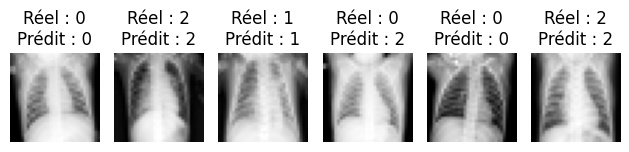

In [16]:
# Cargar el modelo
modelo = load_model(r"..\models\meilleur_modele_roc_2_2.h5")

# Resumen del modelo
modelo.summary()

path=r"..\data\external\chest_xray"

modificacion_32x32 = False
pixels_32x32 = 32

images_32x32 ,etiquetes_32x32 ,_ = load_data(path, modificacion_32x32, pixels_32x32)

# Faire les prédictions
predictions = modelo.predict(images_32x32)

# Convertir les probabilités en étiquettes (pour un problème de classification binaire ou multi-classes)
etiquettes_predites = np.argmax(predictions, axis=1)

# Assurez-vous que les étiquettes sont dans le bon format
etiquettes_reelles = np.array(etiquetes_32x32)

# Calculer la précision
precision = accuracy_score(etiquettes_reelles, etiquettes_predites)
print(f"Précision du modèle : {precision:.2f}")

# Rapport détaillé de classification
print("Rapport de Classification :")
print(classification_report(etiquettes_reelles, etiquettes_predites))

# Sélection de quelques images à visualiser
nombre_exemples = 6
indices = np.random.choice(len(images_32x32), nombre_exemples, replace=False)

for i, idx in enumerate(indices):
    plt.subplot(1, nombre_exemples, i + 1)
    plt.imshow(images_32x32[idx].squeeze(), cmap='gray')
    plt.title(f"Réel : {etiquettes_reelles[idx]}\nPrédit : {etiquettes_predites[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Nous avons effectué la validation avec seulement 8 images par classe, il est donc normal que la précision soit si basse.  
Pour un test réaliste, nous devrions augmenter le nombre d'images de validation.